In [484]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [665]:
df=pd.read_csv('car_price_prediction.csv')
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [667]:
df.shape


(19237, 18)

In [669]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [671]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,19237.0,4.557654e+07,936591.422799,20746880.0,45698374.0,45772308.0,45802036.0,45816654.0
Price,19237.0,1.855593e+04,190581.269684,1.0,5331.0,13172.0,22075.0,26307500.0
Prod. year,19237.0,2.010913e+03,5.668673,1939.0,2009.0,2012.0,2015.0,2020.0
Cylinders,19237.0,4.582991e+00,1.199933,1.0,4.0,4.0,4.0,16.0
Airbags,19237.0,6.582627e+00,4.320168,0.0,4.0,6.0,12.0,16.0


In [673]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [675]:
df.nunique()

ID                  18924
Price                2315
Levy                  559
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64

In [677]:
df['Manufacturer'].value_counts()

Manufacturer
HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
                 ... 
TESLA               1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: count, Length: 65, dtype: int64

In [679]:
df['Manufacturer'].unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
       'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object)

In [681]:
cat_col = [col for col in df.columns if df[col].dtype == 'O']
cat_col

['Levy',
 'Manufacturer',
 'Model',
 'Category',
 'Leather interior',
 'Fuel type',
 'Engine volume',
 'Mileage',
 'Gear box type',
 'Drive wheels',
 'Doors',
 'Wheel',
 'Color']

In [683]:
num_col = [col for col in df.columns if df[col].dtype != 'O']
num_col

['ID', 'Price', 'Prod. year', 'Cylinders', 'Airbags']

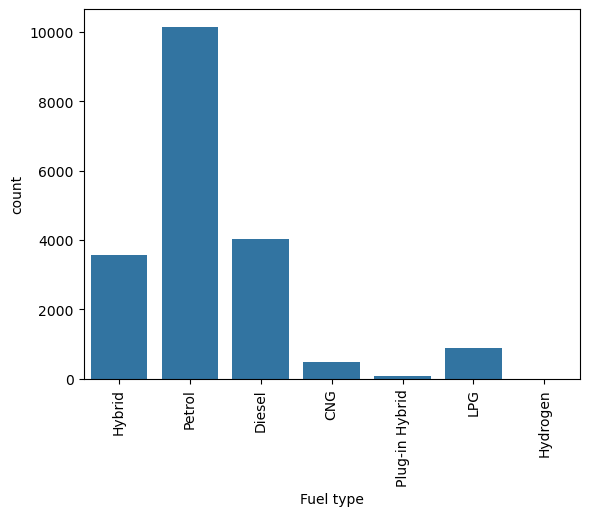

In [496]:
sns.countplot(x='Fuel type',data=df)
plt.xticks(rotation=90)
plt.show()

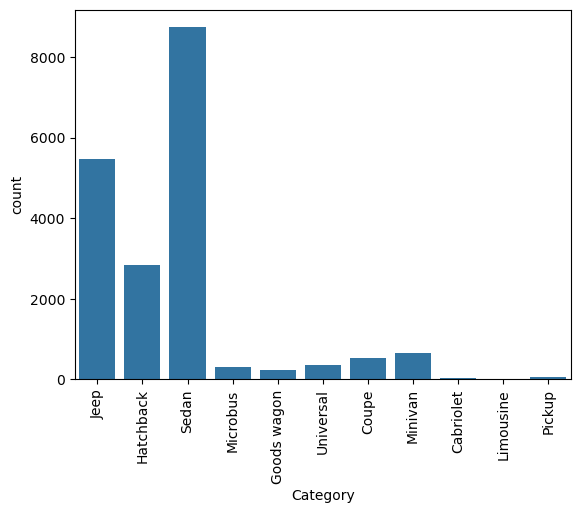

In [497]:
sns.countplot(x='Category',data=df)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Cylinders', ylabel='Mileage'>

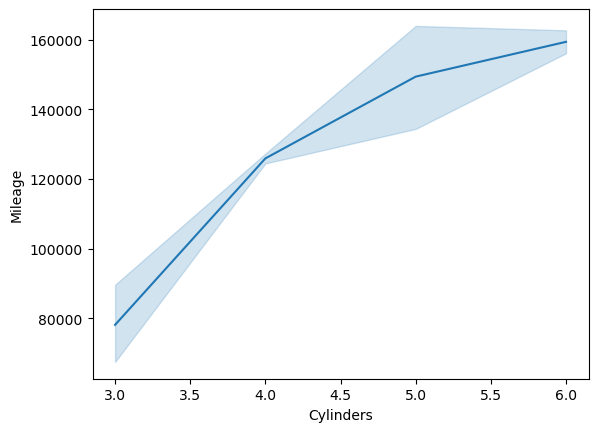

In [601]:
sns.lineplot(x=df["Cylinders"],y=df["Mileage"])

<Axes: >

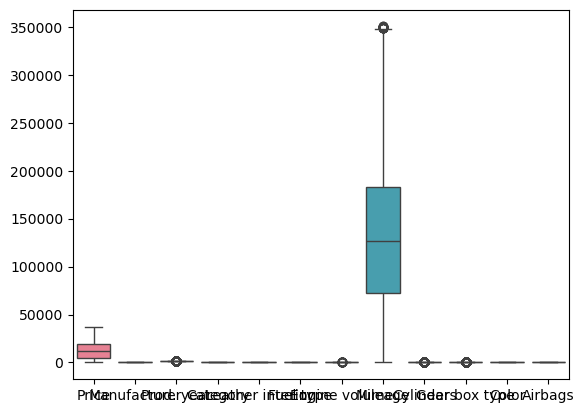

In [599]:
sns.boxplot(df)

In [595]:
df=df.drop(columns=['ID','Levy','Model','Drive wheels','Doors','Wheel'])

In [597]:
df.head()

,Price,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Color,Airbags
0,13328,32,2010,4,1,2,63,186005,6.0,0,12,12
1,16621,8,2011,4,0,5,56,192000,6.0,2,1,8
2,8467,21,2006,3,0,5,22,200000,4.0,3,1,2
3,3607,16,2011,4,1,2,46,168966,4.0,0,14,0
4,11726,21,2014,3,1,5,22,91901,4.0,0,12,4


In [603]:
int(df['Mileage'][0].split()[0])

AttributeError: 'numpy.int64' object has no attribute 'split'

In [605]:
def conv(data):
    data=int(data.split()[0])
    return data

In [607]:
conv("19099 km")

19099

In [609]:
df['Mileage']=df.Mileage.apply(conv)

AttributeError: 'int' object has no attribute 'split'

In [611]:
df.head()

,Price,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Color,Airbags
0,13328,32,2010,4,1,2,63,186005,6.0,0,12,12
1,16621,8,2011,4,0,5,56,192000,6.0,2,1,8
2,8467,21,2006,3,0,5,22,200000,4.0,3,1,2
3,3607,16,2011,4,1,2,46,168966,4.0,0,14,0
4,11726,21,2014,3,1,5,22,91901,4.0,0,12,4


In [613]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [615]:
encoder.fit_transform(df['Color'])

array([12,  1,  1, ...,  7,  1, 14], dtype=int64)

In [617]:
cat_col = [col for col in df.columns if df[col].dtype == 'O']
cat_col

[]

In [619]:
for col in cat_col:
    df[col] = encoder.fit_transform(df[col])

In [621]:
df.head()

,Price,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Color,Airbags
0,13328,32,2010,4,1,2,63,186005,6.0,0,12,12
1,16621,8,2011,4,0,5,56,192000,6.0,2,1,8
2,8467,21,2006,3,0,5,22,200000,4.0,3,1,2
3,3607,16,2011,4,1,2,46,168966,4.0,0,14,0
4,11726,21,2014,3,1,5,22,91901,4.0,0,12,4


In [623]:
df.dtypes

Price                 int64
Manufacturer          int32
Prod. year            int64
Category              int32
Leather interior      int32
Fuel type             int32
Engine volume         int32
Mileage               int64
Cylinders           float64
Gear box type         int32
Color                 int32
Airbags               int64
dtype: object

In [687]:
df.select_dtypes(exclude=object).corr()

,ID,Price,Prod. year,Cylinders,Airbags
ID,1.000000,-0.000844,0.071352,-0.039319,-0.020527
Price,-0.000844,1.000000,0.012982,0.007518,-0.012824
Prod. year,0.071352,0.012982,1.000000,-0.096797,0.236969
Cylinders,-0.039319,0.007518,-0.096797,1.000000,0.176868
Airbags,-0.020527,-0.012824,0.236969,0.176868,1.000000


<Axes: >

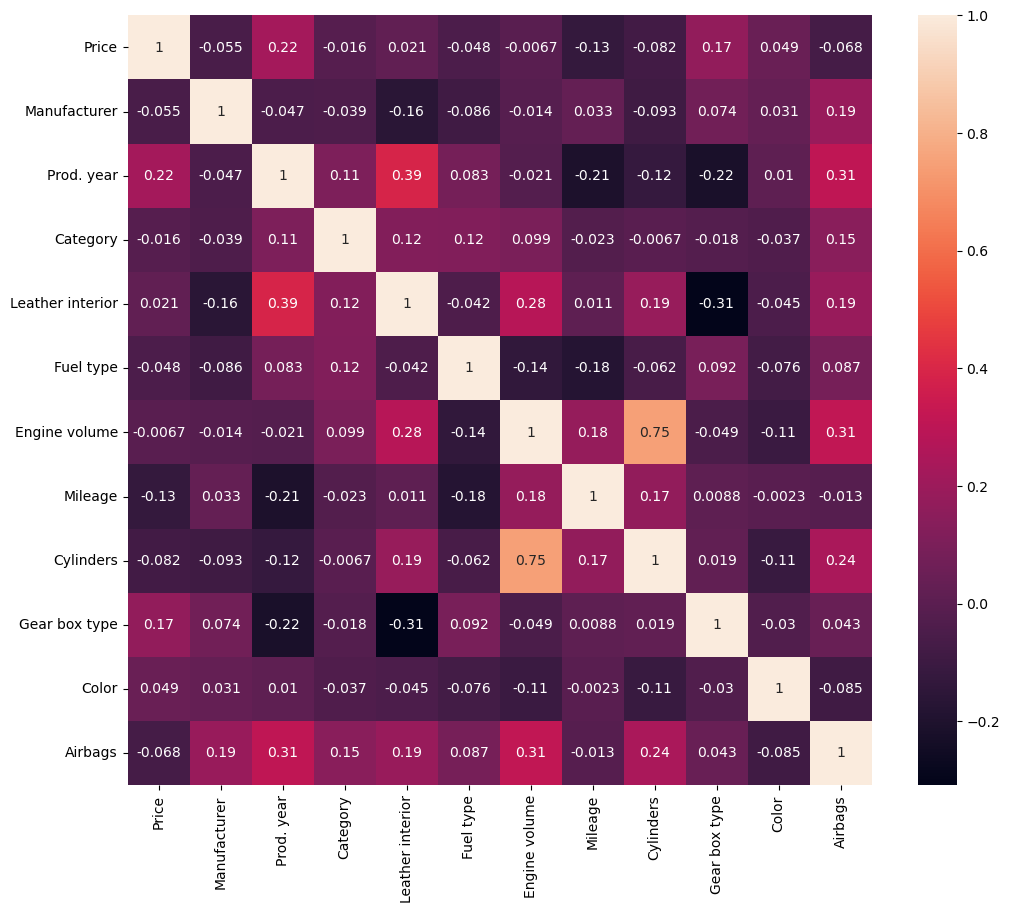

In [627]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(),annot=True)

In [629]:
df.describe()

,Price,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Color,Airbags
count,15540.000000,15540.000000,15540.000000,15540.000000,15540.000000,15540.000000,15540.000000,15540.000000,15540.000000,15540.000000,15540.000000,15540.000000
mean,12513.189575,33.603346,2010.516152,6.370206,0.686293,3.429344,38.886100,132172.519241,4.380759,0.537323,7.913127,6.651931
std,9231.762290,18.159143,5.552289,2.815693,0.464014,1.799626,12.362269,79831.003592,0.791634,0.903025,5.334688,4.297007
min,1.000000,0.000000,1939.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,4704.000000,21.000000,2009.000000,4.000000,0.000000,2.000000,28.000000,72889.250000,4.000000,0.000000,1.000000,4.000000
50%,11760.000000,32.000000,2012.000000,8.000000,1.000000,5.000000,36.000000,127044.000000,4.000000,0.000000,8.000000,6.000000
75%,18817.000000,55.000000,2014.000000,9.000000,1.000000,5.000000,46.000000,182885.250000,4.000000,1.000000,12.000000,12.000000
max,36692.000000,64.000000,2020.000000,10.000000,1.000000,6.000000,92.000000,350421.000000,6.000000,3.000000,15.000000,16.000000


In [631]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.65)
IQR = Q3 - Q1


In [633]:
df.shape

(15540, 12)

In [635]:
df=df[~((df['Price'] < (Q1 - 1.5 * IQR)) | (df['Price'] > (Q3 + 1.5 * IQR)))]

In [637]:
df.corr()

,Price,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Color,Airbags
Price,1.000000,-0.041169,0.196100,-0.002061,-0.015626,-0.018709,-0.035439,-0.113178,-0.098926,0.187812,0.052380,-0.069382
Manufacturer,-0.041169,1.000000,-0.042771,-0.042231,-0.158579,-0.093454,-0.011107,0.032565,-0.094247,0.076298,0.032208,0.193006
Prod. year,0.196100,-0.042771,1.000000,0.110256,0.386837,0.093287,-0.021466,-0.200942,-0.119021,-0.219689,0.008614,0.315934
Category,-0.002061,-0.042231,0.110256,1.000000,0.126103,0.114759,0.101980,-0.024080,-0.005322,-0.019759,-0.038801,0.146544
Leather interior,-0.015626,-0.158579,0.386837,0.126103,1.000000,-0.032389,0.285374,0.016222,0.189082,-0.311953,-0.047510,0.198280
Fuel type,-0.018709,-0.093454,0.093287,0.114759,-0.032389,1.000000,-0.138966,-0.178581,-0.070433,0.080259,-0.071083,0.077570
Engine volume,-0.035439,-0.011107,-0.021466,0.101980,0.285374,-0.138966,1.000000,0.185670,0.747807,-0.060851,-0.107200,0.311852
Mileage,-0.113178,0.032565,-0.200942,-0.024080,0.016222,-0.178581,0.185670,1.000000,0.175594,0.008506,-0.001607,-0.012592
Cylinders,-0.098926,-0.094247,-0.119021,-0.005322,0.189082,-0.070433,0.747807,0.175594,1.000000,0.006949,-0.110536,0.235036
Gear box type,0.187812,0.076298,-0.219689,-0.019759,-0.311953,0.080259,-0.060851,0.008506,0.006949,1.000000,-0.023477,0.030226


In [639]:
from scipy.stats import zscore
z_scores = np.abs(zscore(df))
z_scores

,Price,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Color,Airbags
0,0.176000,0.095771,0.072503,0.845231,0.686689,0.811155,1.959639,0.659514,2.051487,0.594125,0.766981,1.237261
1,0.563197,1.414191,0.106650,0.845231,1.456264,0.864325,1.393804,0.734191,2.051487,1.620054,1.295421,0.309934
2,0.395565,0.700047,0.789113,1.199380,1.456264,0.864325,1.354537,0.833843,0.479167,2.727143,1.295421,1.081056
3,0.967013,0.974718,0.106650,0.845231,0.686689,0.811155,0.585468,0.447267,0.479167,0.594125,1.141963,1.544719
4,0.012366,0.700047,0.644108,1.199380,0.686689,0.864325,1.354537,0.512695,0.479167,0.594125,0.766981,0.617392
...,...,...,...,...,...,...,...,...,...,...,...,...
19232,0.395565,0.123965,2.043181,1.907678,0.686689,1.928141,0.142034,2.079495,0.479167,0.512964,0.766981,0.385561
19233,0.452670,0.590179,0.106650,0.925515,0.686689,0.864325,0.423801,0.355512,0.479167,1.620054,0.579490,0.309934
19234,1.678697,0.590179,0.072503,0.845231,0.686689,1.369648,0.222867,0.207958,0.479167,0.594125,0.170475,0.617392
19235,0.764302,1.414191,0.609960,0.845231,0.686689,1.369648,0.222867,1.018965,0.479167,0.594125,1.295421,0.617392


In [641]:
df.skew()

Price               0.325068
Manufacturer        0.107836
Prod. year         -1.881529
Category           -0.272556
Leather interior   -0.769651
Fuel type          -0.428306
Engine volume       0.598941
Mileage             0.351600
Cylinders           1.501156
Gear box type       1.423931
Color              -0.212946
Airbags             0.029041
dtype: float64

In [643]:
df.shape

(15073, 12)

In [645]:
Q1 = df['Mileage'].quantile(0.25)
Q3 = df['Mileage'].quantile(0.72)
IQR = Q3 - Q1
df=df[~((df['Mileage'] < (Q1 - 1.5 * IQR)) | (df['Mileage'] > (Q3 + 1.5 * IQR)))]

In [647]:
Q1 = df['Cylinders'].quantile(0.22)
Q3 = df['Cylinders'].quantile(0.77)
IQR = Q3 - Q1
df=df[~((df['Cylinders'] < (Q1 - 1.5 * IQR)) | (df['Cylinders'] > (Q3 + 1.5 * IQR)))]

In [649]:
df.skew()

Price               0.234345
Manufacturer        0.159109
Prod. year         -2.088689
Category           -0.275686
Leather interior   -0.590990
Fuel type          -0.442519
Engine volume       0.285979
Mileage             0.369424
Cylinders           0.000000
Gear box type       1.521258
Color              -0.299534
Airbags             0.222641
dtype: float64

In [651]:
df.corr()

,Price,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Color,Airbags
Price,1.000000,-0.061414,0.234578,-0.000930,0.015159,-0.057914,0.088267,-0.094075,NaN,0.137837,0.059209,-0.037419
Manufacturer,-0.061414,1.000000,-0.087617,-0.083001,-0.163566,-0.102515,0.085649,0.055975,NaN,0.116609,0.012512,0.201342
Prod. year,0.234578,-0.087617,1.000000,0.143333,0.431402,0.107306,0.061285,-0.194675,NaN,-0.188096,-0.003118,0.352765
Category,-0.000930,-0.083001,0.143333,1.000000,0.150430,0.142531,0.226328,-0.037870,NaN,-0.041613,-0.043325,0.158101
Leather interior,0.015159,-0.163566,0.431402,0.150430,1.000000,-0.005624,0.194903,-0.044205,NaN,-0.347748,-0.021695,0.128697
Fuel type,-0.057914,-0.102515,0.107306,0.142531,-0.005624,1.000000,-0.138654,-0.159253,NaN,0.047364,-0.106637,0.138292
Engine volume,0.088267,0.085649,0.061285,0.226328,0.194903,-0.138654,1.000000,0.080595,NaN,-0.063024,-0.035447,0.177065
Mileage,-0.094075,0.055975,-0.194675,-0.037870,-0.044205,-0.159253,0.080595,1.000000,NaN,0.027713,0.026915,-0.080790
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gear box type,0.137837,0.116609,-0.188096,-0.041613,-0.347748,0.047364,-0.063024,0.027713,NaN,1.000000,-0.031214,0.079070


In [653]:
f=df.corr().columns[abs(df.corr()['Price'])>.0009]
f

Index(['Price', 'Manufacturer', 'Prod. year', 'Category', 'Leather interior',
       'Fuel type', 'Engine volume', 'Mileage', 'Gear box type', 'Color',
       'Airbags'],
      dtype='object')

In [655]:
df[f].corr()

,Price,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Color,Airbags
Price,1.000000,-0.061414,0.234578,-0.000930,0.015159,-0.057914,0.088267,-0.094075,0.137837,0.059209,-0.037419
Manufacturer,-0.061414,1.000000,-0.087617,-0.083001,-0.163566,-0.102515,0.085649,0.055975,0.116609,0.012512,0.201342
Prod. year,0.234578,-0.087617,1.000000,0.143333,0.431402,0.107306,0.061285,-0.194675,-0.188096,-0.003118,0.352765
Category,-0.000930,-0.083001,0.143333,1.000000,0.150430,0.142531,0.226328,-0.037870,-0.041613,-0.043325,0.158101
Leather interior,0.015159,-0.163566,0.431402,0.150430,1.000000,-0.005624,0.194903,-0.044205,-0.347748,-0.021695,0.128697
Fuel type,-0.057914,-0.102515,0.107306,0.142531,-0.005624,1.000000,-0.138654,-0.159253,0.047364,-0.106637,0.138292
Engine volume,0.088267,0.085649,0.061285,0.226328,0.194903,-0.138654,1.000000,0.080595,-0.063024,-0.035447,0.177065
Mileage,-0.094075,0.055975,-0.194675,-0.037870,-0.044205,-0.159253,0.080595,1.000000,0.027713,0.026915,-0.080790
Gear box type,0.137837,0.116609,-0.188096,-0.041613,-0.347748,0.047364,-0.063024,0.027713,1.000000,-0.031214,0.079070
Color,0.059209,0.012512,-0.003118,-0.043325,-0.021695,-0.106637,-0.035447,0.026915,-0.031214,1.000000,-0.071967


In [657]:
df1=df[f]

In [659]:
X = df1.drop(columns=["Price"])  
y = df1["Price"] 

In [661]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [663]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


gbr_model = GradientBoostingRegressor(
    n_estimators=200,  
    learning_rate=0.1, 
    max_depth=5,  
    random_state=42)

gbr_model.fit(X_train, y_train)

y_pred = gbr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R2 Score:", r2)

Mean Squared Error (MSE): 23015681.37318148
R2 Score: 0.6703115189401598
